<a href="https://colab.research.google.com/github/LauraR32/Pruebas-Convocatoria-IO-I/blob/main/Estructura_de_soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PASO 1: INSTALAR LA LIBRERIA


In [ ]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


PASO 2: IMPORTAR LA LIBRERIA

In [ ]:
import cvxpy as cvx #PARA SOLUCIONAR EL PROBLEMA LINEAL
import numpy as np  #PARA OPERACIONES MATEMATICAS

PASO 2: FORMULAR EL PROBLEMA DE FORMA MATRICIAL


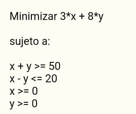

In [ ]:
x=cvx.Variable((2,1), nonneg=True) # variables

c=[3,8] #coeficiente de costos de la función objetivo

#FUNCION OBJETIVO
Z=cvx.Minimize(c@x) # multiplica el vector costos por las variables x

#COEFICIENTES TECNOLOGICOS DE REESTRICIONES
A=[ [1,-1],
   [1,1]
   ]

#LD
b=[[50,-20]]

#MATRIZ DE RESTRICIONES
r=[A@x >= b]

#PRBLEMA DE OPTIMIZACIÓN
P=cvx.Problem(Z,r)


PASO3: Resolver

In [ ]:
#SOLVER QUE VIENE POR DEFECTO
P.solve()

Z1=P.value
print("estado del problema", P.status)
print("Z min", np.round(Z1,0))
print('\nvalor de las variables', np.round(x.value,0))

#SOLVER ECOS_BB
P.solve(solver=cvx.ECOS_BB)
Z2=P.value
print("estado del problema", P.status)
print("Z min", np.round(Z2,0))
print('\nvalor de las variables', np.round(x.value,0))

#SOLVER OSQP
P.solve(solver=cvx.OSQP)
Z3=P.value
print("estado del problema", P.status)
print("Z min", np.round(Z3,0))
print('\nvalor de las variables', np.round(x.value,0))

estado del problema optimal
Z min 225.0

valor de las variables [[35.]
 [15.]]
estado del problema optimal
Z min 225.0

valor de las variables [[35.]
 [15.]]
estado del problema optimal
Z min 225.0

valor de las variables [[35.]
 [15.]]


Diferencias en la solución de del metodo ECOS _bb con el OSQP

In [ ]:
print("Error de Z:",Z2-Z3)

Error de Z: -3.1839630310059874e-07


**solución con la libreria scipy**

Resuelve problema con la siguiente forma

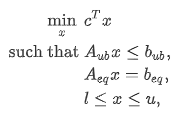

In [ ]:
from scipy.optimize import linprog

In [ ]:
# COEFICIENTES DE COSTOS
c=[3,8]

#COEF- TECNOLOGICOS
A=[ [-1,-1],
   [1,-1]  
]

#LD
b=[[-50,20]]


#SOLVER highs-ds
res=linprog(c,A,b,bounds=(0,None), method='highs-ds')
Z1=res.fun
print("Z min", np.round(Z1,3))
print('\nvalor de las variables', np.round(res.x,0))

#SOLVER highs
res=linprog(c,A,b,bounds=(0,None), method='highs')
Z2=res.fun
print("Z min", np.round(Z2,3))
print('\nvalor de las variables', np.round(res.x,0))

#SOLVER simplex
res=linprog(c,A,b,bounds=(0,None), method='simplex')
Z3=res.fun
print("Z min", np.round(Z3,3))
print('\nvalor de las variables', np.round(res.x,0))

Z min 225.0

valor de las variables [35. 15.]
Z min 225.0

valor de las variables [35. 15.]
Z min 225.0

valor de las variables [35. 15.]


Diferencias entre el metodo hights y simplex

In [ ]:
print("Error de Z:",Z1-Z3)

Error de Z: 0.0
